This dataset contains detailed information about Amazon products, including pricing trends, discounts, customer ratings, reviews, and product metadata.
It consists of 1,000+ product listings, scraped using BeautifulSoup and Selenium WebDriver from Amazon’s website.   



Key Features.  
product_id – Unique identifier for each product.  
product_name – Name of the product.  
category – Product category (e.g., Electronics, Clothing, Accessories).   
discounted_price – Final selling price after discount.   
actual_price – Original listed price.     
discount_percentage – Percentage discount applied.  
rating – Average customer rating.   
rating_count – Number of ratings received.  
about_product – Product description.  
user_id, user_name – Reviewer information.  
review_id, review_title, review_content – Review metadata.  
img_link, product_link – Product image & official Amazon link.


Business Problem Statement

E-commerce platforms generate massive volumes of data daily.
A key challenge is understanding what drives product success — pricing, discounts, ratings, or customer sentiment.

This dataset helps us:
- Analyze price–discount relationships
- Understand review & rating influence
- Identify top performing categories
- Assist in strategic business decision-making.  

Goals of the Analysis
- Exploratory Data Analysis (EDA).   
Study product distribution, categories, and pricing.   
Analyze rating and review behavior

- Business Insights.   
Identify key drivers of product performance.  
Understand how pricing & discounts influence engagement

- Predictive Modeling.  
Build machine learning models for forecasting / classification.  
Support data-driven pricing & marketing strategies.

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, HTML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/amazon.csv')
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [5]:
print(f'This dataset contain {df.shape[0]} rows and {df.shape[1]} columns')

This dataset contain 1465 rows and 16 columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [12]:
df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [13]:
df['discounted_price'] = (df['discounted_price'].str.replace("₹","").str.replace(",","").astype(float))
df['actual_price'] = (df['actual_price'].str.replace("₹","").str.replace(",","").astype(float))
df['discount_percentage'] = (df['discount_percentage'].str.replace("%","").astype(float)/100)
df['rating_count'] = (df['rating_count'].str.replace(",","").astype(float))
df['rating'] = (df["rating"].replace("|","3.9").astype(float))


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [16]:
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

In [17]:
df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [18]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18277.634812
std,6944.304394,10874.826864,0.216359,0.291620,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


Market appears discount-driven + price sensitive.   
Half the products sell at half price vs MRP.   

High-price premium items exist but are niche in volume. Portfolio includes ultra-low to luxury.

Ratings are not a strong quality discriminator, but rating count is powerful to identify bestsellers.

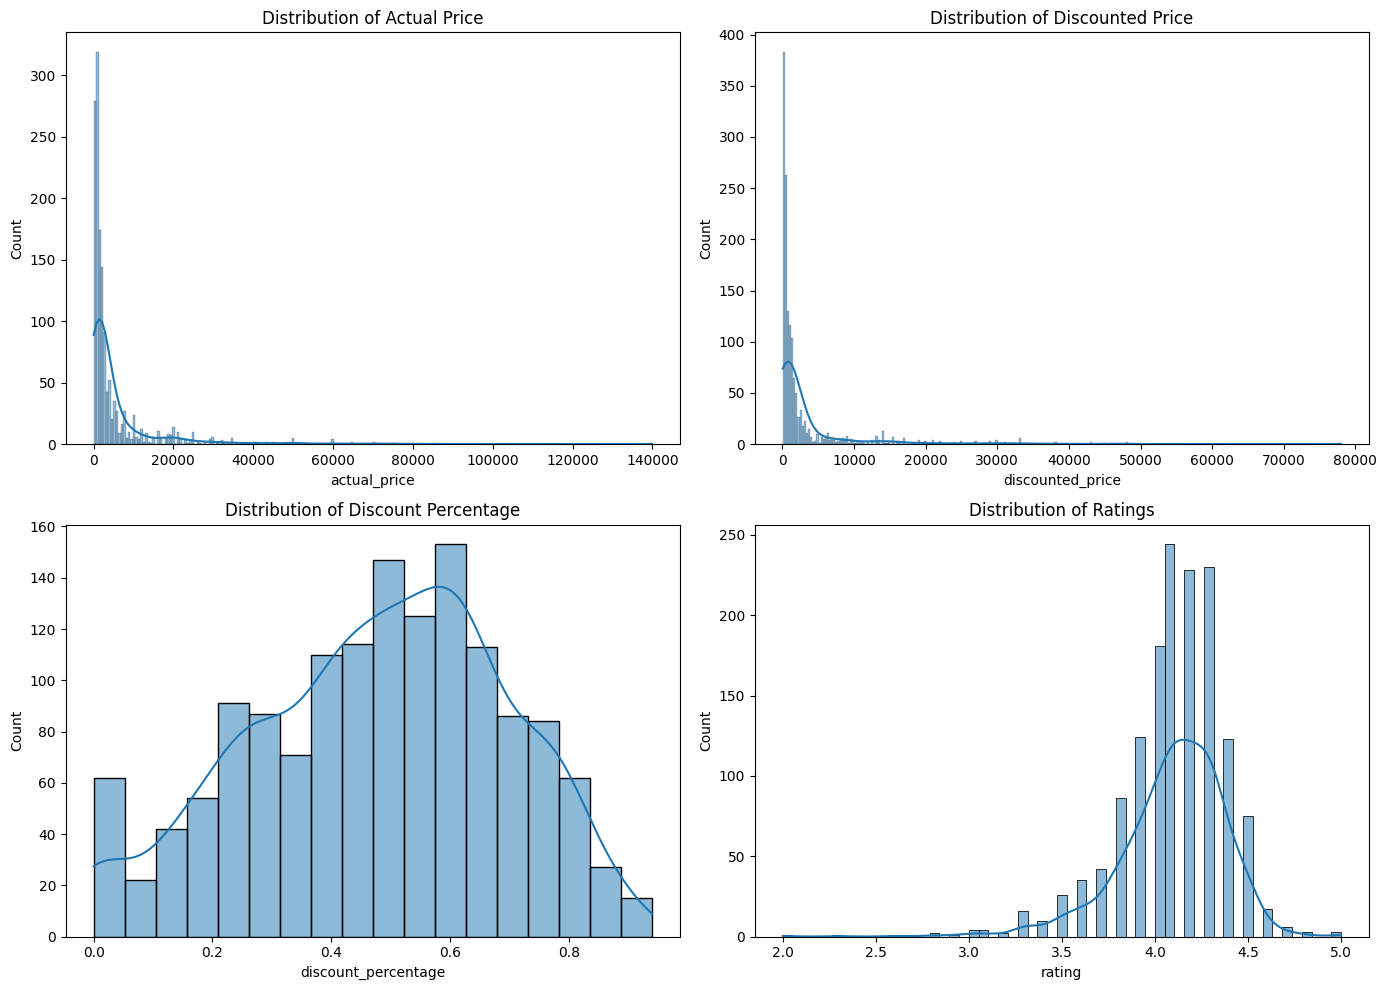

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['actual_price'], kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution of Actual Price")

sns.histplot(df['discounted_price'], kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution of Discounted Price")


sns.histplot(df['discount_percentage'], kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution of Discount Percentage")

sns.histplot(df['rating'], kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribution of Ratings")

plt.tight_layout()
plt.show()

Actual price and discounted price both are extremely right skewed.   
The histogram shows a wide spread, but the bulk of the data sits between 30% and 70%.

The most frequent discounts appear to be in the 50-60% range, suggesting a strategy heavily reliant on deep discounting rather than small markdowns.

Most products are rated between 4.0 and 4.5, with very few falling below 3.0. This could indicate high product quality, or potentially rating inflation where users rarely give low scores.

product in this dataset is a low-cost item, sold at a significant discount (approx. 50% off), with a rating slightly above 4 stars.

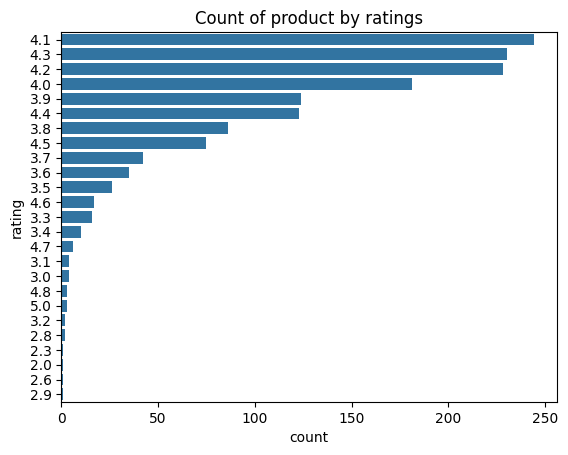

In [39]:
sns.countplot(y=df['rating'], order = df['rating'].value_counts().index)
plt.title('Count of product by ratings')
plt.show()

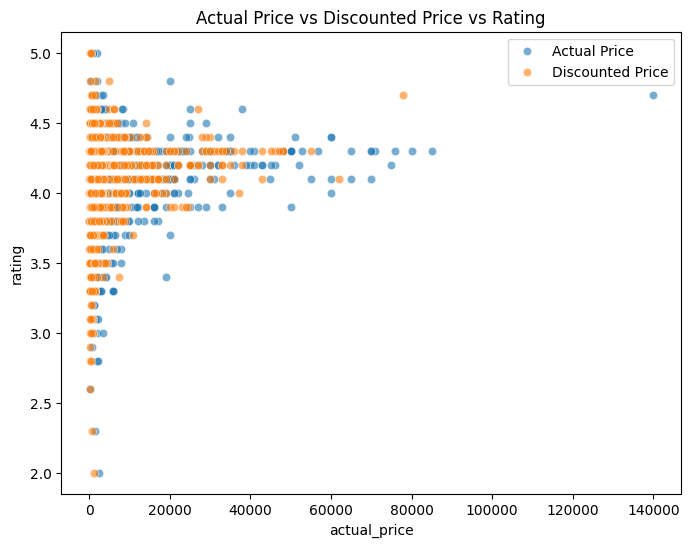

In [52]:
plt.figure(figsize=(8,6))

sns.scatterplot(x="actual_price", y="rating", data=df, alpha=0.6, label="Actual Price")
sns.scatterplot(x="discounted_price", y="rating", data=df, alpha=0.6, label="Discounted Price")

plt.title("Actual Price vs Discounted Price vs Rating")
plt.legend()
plt.show()


higher prices correlate with consistent quality, as products priced over 40,000 rarely drop below a 3.5-star rating.

In contrast, the budget market is a gamble, where low prices lead to highly volatile customer satisfaction ranging anywhere from 2.0 to 5.0 stars.

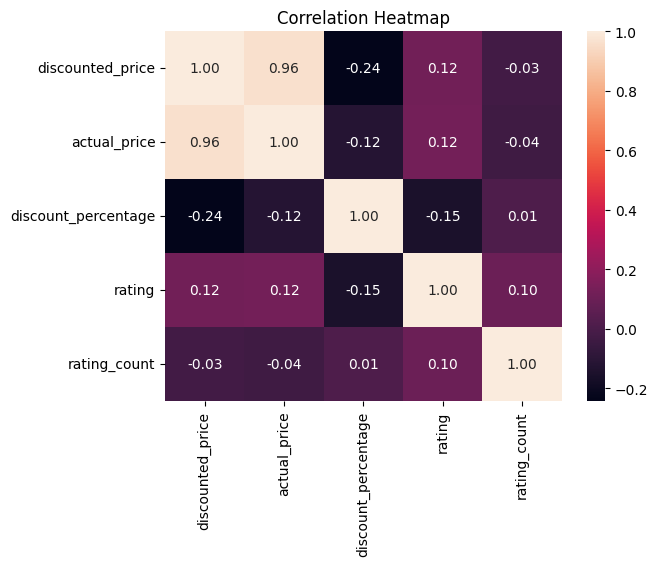

In [50]:
corr = df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Negative correlation (-0.15) between discount_percentage and rating, this suggests that heavily discounted items tend to have slightly lower ratings, perhaps indicating they are clearance stock or perceived as lower quality.


While the scatter plot shows high-priced items (>$40k$) rarely fail, the overall correlation between actual_price and rating is only 0.12. This confirms that for the vast majority of inventory (the "budget" tier), paying more does not guarantee a better rating.

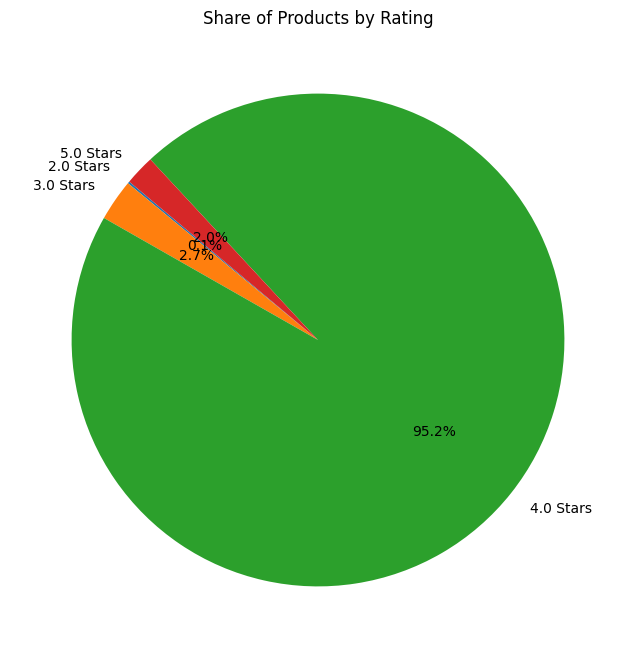

In [55]:
df['rating_rounded'] = df['rating'].round()

rating_share = df['rating_rounded'].value_counts().sort_index()

plt.figure(figsize=(8,8))
plt.pie(rating_share, labels=rating_share.index.astype(str) + " Stars",
        autopct="%1.1f%%", startangle=140)
plt.title("Share of Products by Rating")
plt.show()

95.2% of all products fall into the 4-star category, this extreme imbalance explains why the correlation numbers were so weak.

Only 2.8% of the entire catalog is rated 3 stars or lower. This suggests that the risk of a low-quality purchase is incredibly small, or that the platform suffers from significant rating inflation where even mediocre products get 4 stars.

Since nearly every product has a "good" score, the Rating Count becomes the only real way to differentiate a bestseller from a dormant listing.

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = df.select_dtypes(include=['object']).columns


label_encoders = {}
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col].astype(str))
  label_encoders[col] = le

num_cols = df.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [62]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_rounded
0,-0.860675,1.249139,-1.405733,-0.392731,-0.399774,0.754029,0.355205,0.140271,-0.459733,0.071331,-0.236898,0.669688,0.811207,0.016735,1.019376,1.361995,0.044705
1,0.437813,-1.381938,-1.405733,-0.421541,-0.468764,-0.216911,-0.330854,0.602076,-0.977796,-1.472942,-1.141375,1.277878,-1.697203,-0.526936,1.338869,-1.359631,0.044705
2,0.362801,0.902268,-1.405733,-0.421541,-0.326185,1.956146,-0.673883,-0.242307,1.601893,0.723678,-0.351752,0.698928,-0.506139,0.215986,0.424628,1.012038,0.044705


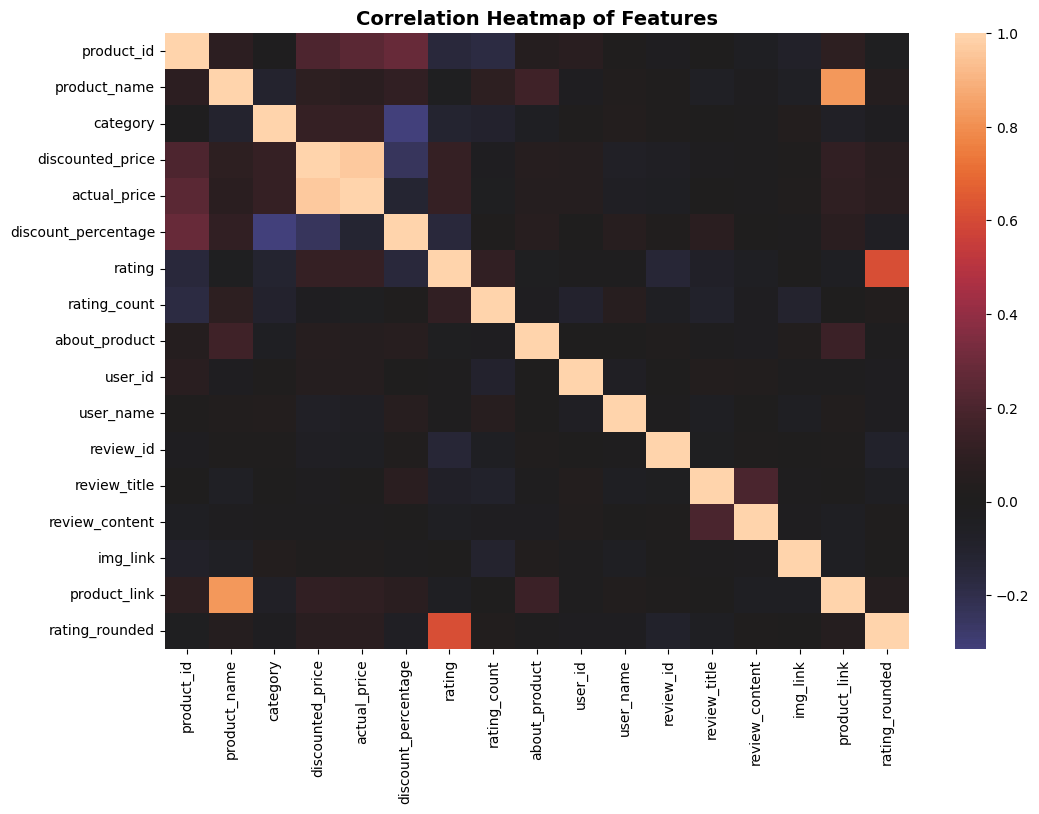

In [64]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=False, center=0)
plt.title("Correlation Heatmap of Features", fontsize=14, weight="bold")
plt.show()

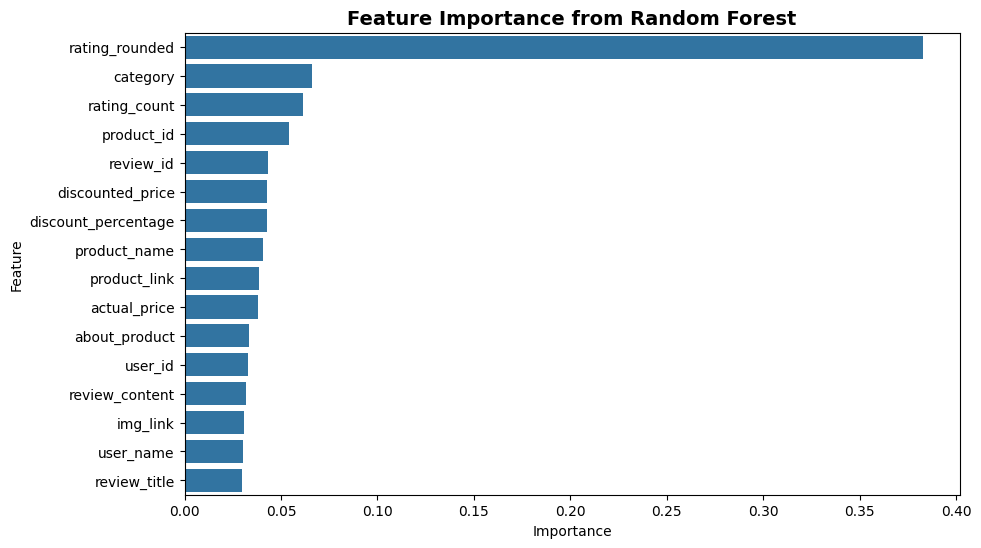

In [67]:
target = "rating"
X = df.drop(columns=[target])
y = df[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X,y)

importance = model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({'Feature':feature_names, "Importance": importance})
feat_imp = feat_imp.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance from Random Forest", fontsize=14, weight="bold")
plt.show()

We want to predict the discounted price (Sales) of Amazon products based on product attributes.   
Type: Regression Problem.  
Target Variable: discounted_price.  
Evaluation Metrics: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), R² Score

In [68]:
X = df.drop(columns=["discounted_price"])
y = df["discounted_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1172, 16)
Test shape: (293, 16)


In [71]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

baseline_models = {}

# Linear Regression
lr = LinearRegression()
baseline_models["Linear Regression"] = evaluate_model(lr, X_train, y_train, X_test, y_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
baseline_models["Decision Tree"] = evaluate_model(dt, X_train, y_train, X_test, y_test)


results_df = pd.DataFrame(baseline_models).T
print(results_df.round(4))

                     RMSE     MAE      R2
Linear Regression  0.2557  0.1205  0.9377
Decision Tree      0.2439  0.0550  0.9433


In [72]:
advanced_models = {}

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
advanced_models["Random Forest"] = evaluate_model(rf, X_train, y_train, X_test, y_test)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
advanced_models["Gradient Boosting"] = evaluate_model(gb, X_train, y_train, X_test, y_test)

# XGBoost
xgbr = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)
advanced_models["XGBoost"] = evaluate_model(xgbr, X_train, y_train, X_test, y_test)

results_df2 = pd.DataFrame(advanced_models).T
print(results_df2.round(4))

                     RMSE     MAE      R2
Random Forest      0.1897  0.0420  0.9657
Gradient Boosting  0.1743  0.0404  0.9711
XGBoost            0.1653  0.0345  0.9740


,RMSE,MAE,R2
XGBoost,0.165253,0.034520,0.973980
Gradient Boosting,0.174287,0.040408,0.971057
Random Forest,0.189657,0.042044,0.965727
Decision Tree,0.243945,0.055024,0.943299
Linear Regression,0.255739,0.120470,0.937683


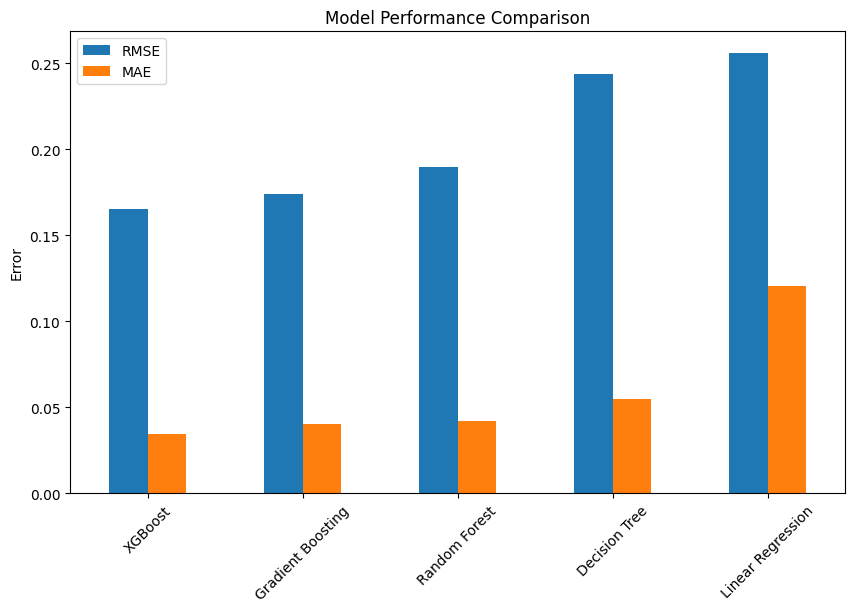

In [75]:
all_results_df = pd.concat([results_df, results_df2])

all_results_df = all_results_df.sort_values("RMSE")

display(all_results_df)

all_results_df[["RMSE","MAE"]].plot(kind="bar", figsize=(10,6), rot=45)
plt.title("Model Performance Comparison")
plt.ylabel("Error")
plt.show()


Best Model: XGBoost


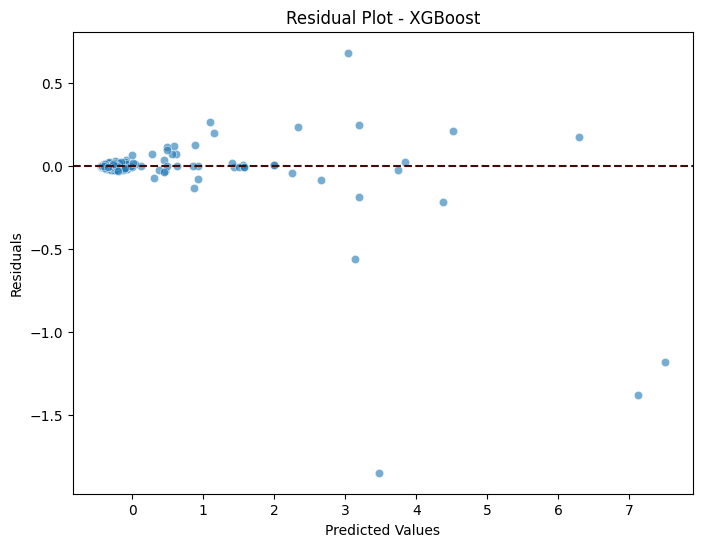

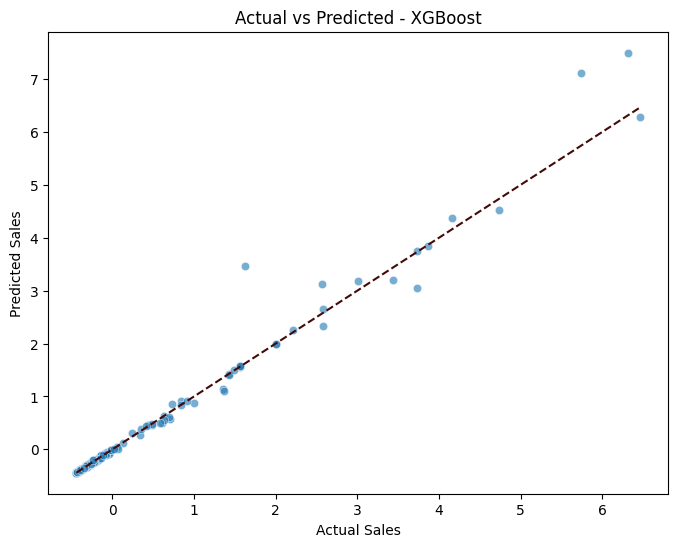

In [76]:
# Pick best model based on lowest RMSE from all models
best_model_name = all_results_df["RMSE"].idxmin()
print("Best Model:", best_model_name)

# Map model names to objects
model_map = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "XGBoost": xgbr
}

best_model = model_map[best_model_name]

# Train best model
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="#420b08", linestyle="--")
plt.title(f"Residual Plot - {best_model_name}")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="#420b08", linestyle="--")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()
